In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from transit_periodogram import transit_periodogram

<Container object of 3 artists>

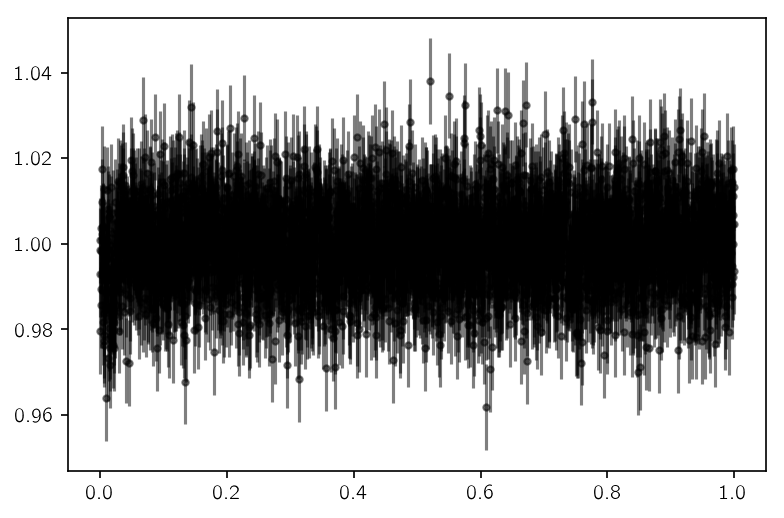

In [3]:
np.random.seed(49)

time = np.linspace(0, 60, 3000)

flux_err = 0.01 + np.zeros_like(time)
period = 5

transit_depth = 0.01
transit_time = 0.5
transit_duration = 0.125

flux = np.ones_like(time)
flux[(time % period) < transit_duration] = 1.0 - transit_depth

flux += flux_err * np.random.randn(len(flux))

plt.errorbar((time%period)/period, flux, yerr=flux_err, fmt=".k", alpha=0.5)
# plt.xlim(0, );

In [4]:
df = 0.5 / (time.max() - time.min())
fmax = 0.1 / np.median(np.diff(time))
freq = np.arange(10*df, fmax, 0.02*df)
periods = 1.0 / freq
len(freq)

29491

In [5]:
periods, periodogram, depth, depth_ivar, phase = \
    transit_periodogram(time, flux, periods, transit_duration,
                        flux_err=flux_err, progress=True)

100%|██████████| 29491/29491 [00:18<00:00, 1566.16it/s]


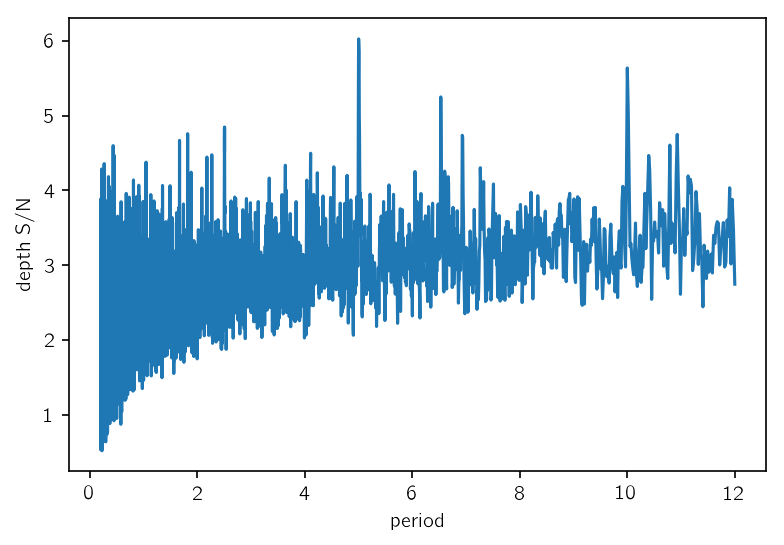

In [6]:
plt.plot(periods, periodogram)
plt.xlabel("period")
plt.ylabel("depth S/N");

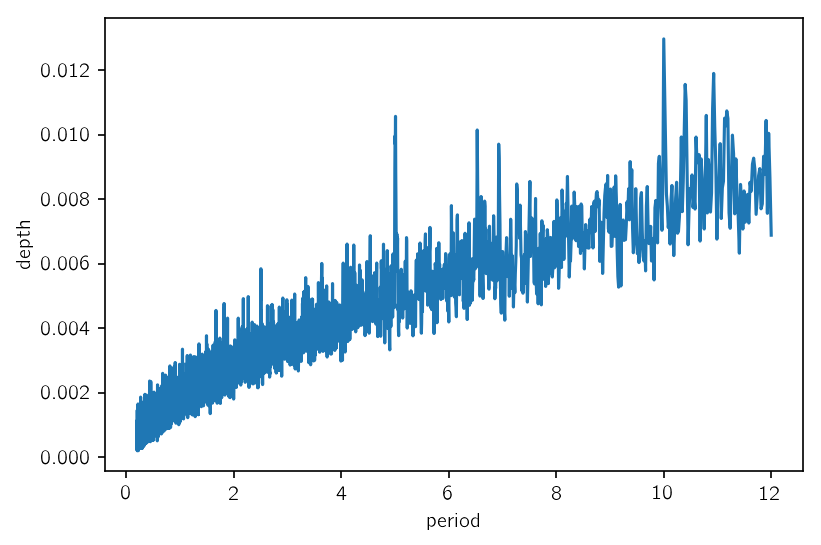

In [9]:
plt.plot(periods, depth)
plt.xlabel("period")
plt.ylabel("depth");